<img src = "https://raw.githubusercontent.com/touchaee/touchaee.github.io/master/images/Project-Capstone.png">
<h1 align = center>Where to open a new Thai restaurant in New York?</h1>

## Table of Contents
* [1. Introduction: Business Problem](#introduction)
* [2. Data](#data)
* [3. Methodology](#methodology)
* [4. Analysis](#analysis)
* [5. Results and Discussion](#results)
* [6. Conclusion](#conclusion)

## 1. Introduction: Business Problem <a name="introduction"></a>

Over the last 20 years, Thai restaurants have been one of the fastest-growing dining categories in New York City. Ever since the advent of places specializing in regional cuisines, often presenting recipes not seen here before, the Thai dining scene has been more exciting than ever before. So that now we have the fiery food of Isan in the northeast, the mellower food of Chiang Mai near the Burmese border, oodles of noodles from Sukhothai, the curries of central and southern Thailand, the urban cuisine of Bangkok, and the Malaysian-leaning food of the peninsula. Our newest arrival is the food of the capital’s Chinatown.

But the pandemic has been tough on Thai restaurants, a one-third have closed, mostly as a result of the pandemic. The good news is that new places have arisen to replace them; in fact, Thai has been most prominent in the category of new restaurants, as will be shown in what follows, along with lots of highly recommended old favorites.

This project aims to find a location for the opening of a Thai restaurant in NY, Specifically, this report will be targeted to stakeholders interested in opening any restaurant place like **Thai Restaurant** in **New York City**.

The first task would be to **find the areas lack Thai Restaurants** by analyzing restaurant data from FourSquare API and **shortlisting an area**, where Thai restaurant is not amongst the most common venues.

We will make use of our data science tools to analyze data and focus on the areas and explore its areas and the 10 most common venues in each area so that the best areas where Thai restaurant is not amongst the most common venue can be selected.

## 2. Data <a name="data"></a>

Based on the definition of our problem, the factors that will influence our decision are:
* finding the areas lack Thai Restaurants
* finding the most common venues
* Choosing the right neighborhood within the borough

We will be using the geographical coordinates of NY to plot neighborhoods in a borough that is lack of Thai Restaurant and in the city's vicinity, and finally, cluster our neighborhoods and present our findings.

Following data sources will be needed to extract/generate the required information:

- [**Part 1**: Using a IBM dataset containing the New York Borough, Neighborhood and geometry coordinates](#part1):  A dataset consisting of Borough, Neighborhood, Latitude and Longitude

- [**Part 2**: Gathering Thai Restaurant data for each neighborhood from FoursquareAPI](#part2): Get the venue data that belongs to the neighborhood and borough.

- [**Part 3**: Gathering additional information about the Thai Restaurant for each neighborhood from FoursquareAPI](#part3): Get the additional venue data such as likes, ratings and price.

### Importing all the necessary Libraries

In [1]:
import numpy as np
import pandas as pd

# use the inline backend to generate the plots within the browser
%matplotlib inline 

#Importing Matplot lib and associated packages to perform Data Visualisation and Exploratory Data Analysis
import matplotlib as mpl
import matplotlib.pyplot as plt

#mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#Importing folium to visualise Maps and plot based on Lat and Lng
import folium

#Requests to request web pages by making get requests to FourSquare REST Client
import requests

#To normalise data returned by FourSquare API
from pandas.io.json import json_normalize

#Importing KMeans from SciKit library to Classify neighborhoods into clusters
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Importing itertools for visualize
from itertools import cycle, islice

#Use to find sse
from numpy import matlib as mb

print('Libraries imported')

Matplotlib version:  3.1.0
Libraries imported


### **Part 1:** Using a IBM dataset containing the New York Borough, Neighborhood and geometry coordinates<a name="part1"></a>


####  New York Dataset

Properties of the New York dataset

*   Borough - Recorded borough
*   Neighborhood - Recorded neighborhood
*   Latitude - Recorded latitude
*   Longitude - Recorded longitude


Data set URL: https://cocl.us/new_york_dataset

In [2]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        # get Borough and Neighborhood
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        # get Latitude and Longitude
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [3]:
df = get_new_york_data()

In [4]:
df.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

##### Total Neighborhood in different Borough

In [5]:
df_count_neigh = df.groupby('Borough').count()['Neighborhood'].sort_values(ascending = False).to_frame()

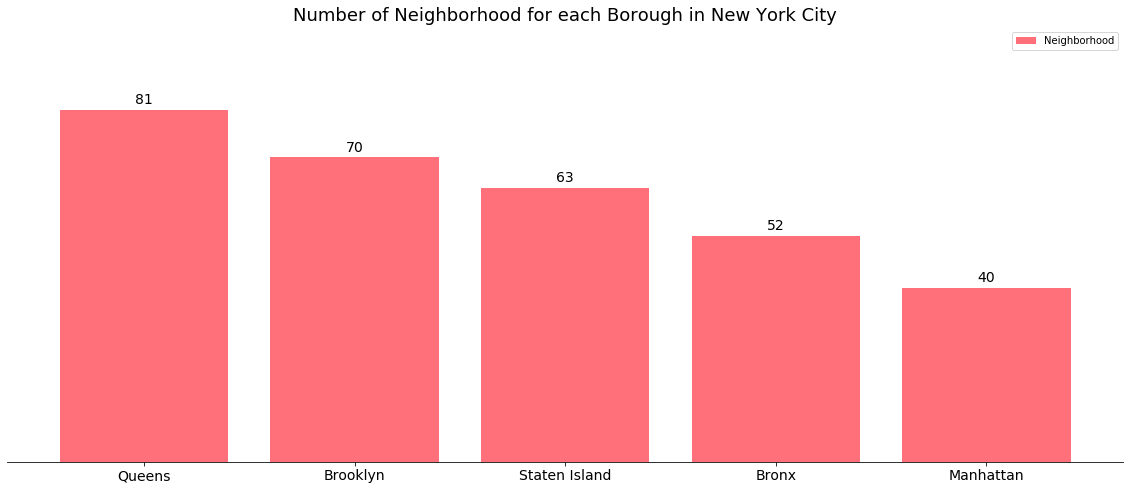

In [6]:
#set ax parameters
figsize = (20, 8)
width = 0.8
title = "Number of Neighborhood for each Borough in New York City"

#Create ax
ax = df_count_neigh.plot(kind = 'bar', figsize = figsize, width = width, color = '#FF707B', rot = 0)
ax.set_ylim(0, 100)

#Text Decoration
ax.set_title(title, fontdict = {'fontsize': 18})
ax.set_xticklabels(df_count_neigh.index, fontdict = {'fontsize': 14})
ax.set_xlabel("")

#Borderless
ax.set_yticklabels("")
ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

for p in ax.patches:                 
    ax.annotate(
        "{}".format(p.get_height()),
        (p.get_x()+p.get_width()/2., p.get_height()), 
        ha='center',
        va='center', 
        xytext=(0, 10),
        textcoords='offset points', 
        fontsize = 14
    )

'''
#percentage on Movie
plt.annotate('',              # s: str. Will leave it blank for no text
     xy=(0.7, 90),          # place head of the arrow at point (year 2012 , pop 70)
     xytext=(0, 60),      # place base of the arrow at point (year 2008 , pop 20)
     xycoords='data',         # will use the coordinate system of the object being annotated 
     arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='#3790E8', lw=4)
    )

plt.annotate(
    'Queens',
    xy = (0.7, 90),
    fontsize= 16
)
'''

plt.show()

We see that Queens has highest numbe\r of neighborhoods

### **Part 2:** Gathering Thai Restaurant data for each neighborhood from FoursquareAPI<a name="part2"></a>

#### Define a function to intract with FourSquare API
get top 200 venues within a radius of 1500 metres for a given latitude and longitude. Below function will return us the venue id , venue name, category, latitude and longitude.

In [7]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=200
    CLIENT_ID = 'RZDYH51XGA4ZLDY3HLI5UWLNWEKUMMLKGYABRT2CGO12XCBZ' # changed my Foursquare ID
    CLIENT_SECRET = '4ZPM33XMBRGDBG4KWJZJ2VS5CXDGYGAVGWJ2QS3QSRDPGLWE' # changed Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_lat = row['venue']['location']['lat']
            venue_lng = row['venue']['location']['lng']
            venue_details.append([venue_id,venue_name,venue_category,venue_lat,venue_lng])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category','Venue_lat','Venue_lng']
    df = pd.DataFrame(venue_details,columns=column_names)
    print("done")
    return df

#### Define a function to get venue details.

In [8]:
def get_venue_details(venue_id):
        
    CLIENT_ID = 'RZDYH51XGA4ZLDY3HLI5UWLNWEKUMMLKGYABRT2CGO12XCBZ' # changed my Foursquare ID
    CLIENT_SECRET = '4ZPM33XMBRGDBG4KWJZJ2VS5CXDGYGAVGWJ2QS3QSRDPGLWE' # changed Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_price_message = venue_data['price']['message']
        venue_price_tier = venue_data['price']['tier']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips,venue_price_message,venue_price_tier])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips','Price_message','Price_tier']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

#### Collect Thai restaurant data for each neighborhood and borough

In [9]:
# prepare neighborhood list that contains Thai resturants
column_names=['Borough', 'Neighborhood', 'ID','Name', 'Category','Venue_lat','Venue_lng']
Thai_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in df.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    Thai_resturants = venues[venues['Category'] == 'Thai Restaurant']   
    print(f'({count}/{len(df)}) Thai Resturants in {Neighborhood}, {Borough} : {str(len(Thai_resturants))}')
    for resturant_detail in Thai_resturants.values.tolist():
        id, name , category, venue_lat, venue_lng = resturant_detail
        Thai_rest_ny = Thai_rest_ny.append({'Borough': Borough,
                                            'Neighborhood': Neighborhood, 
                                            'ID': id,
                                            'Name' : name,
                                            'Category' : category,
                                            'Venue_lat' : venue_lat,
                                            'Venue_lng' : venue_lng
                                               }, ignore_index=True)
    count+=1

done
(1/306) Thai Resturants in Wakefield, Bronx : 0
done
(2/306) Thai Resturants in Co-op City, Bronx : 0
done
(3/306) Thai Resturants in Eastchester, Bronx : 0
done
(4/306) Thai Resturants in Fieldston, Bronx : 0
done
(5/306) Thai Resturants in Riverdale, Bronx : 1
done
(6/306) Thai Resturants in Kingsbridge, Bronx : 1
done
(7/306) Thai Resturants in Marble Hill, Manhattan : 1
done
(8/306) Thai Resturants in Woodlawn, Bronx : 0
done
(9/306) Thai Resturants in Norwood, Bronx : 0
done
(10/306) Thai Resturants in Williamsbridge, Bronx : 0
done
(11/306) Thai Resturants in Baychester, Bronx : 0
done
(12/306) Thai Resturants in Pelham Parkway, Bronx : 0
done
(13/306) Thai Resturants in City Island, Bronx : 0
done
(14/306) Thai Resturants in Bedford Park, Bronx : 0
done
(15/306) Thai Resturants in University Heights, Bronx : 0
done
(16/306) Thai Resturants in Morris Heights, Bronx : 0
done
(17/306) Thai Resturants in Fordham, Bronx : 0
done
(18/306) Thai Resturants in East Tremont, Bronx : 

Save dataframe as csv named _'thai_rest_ny.csv'_

In [10]:
#Thai_rest_ny.to_csv('thai_rest_ny.csv')

In [11]:
#Thai_rest_ny = pd.read_csv('thai_rest_ny.csv', index_col = 0)

In [12]:
Thai_rest_ny.head()

Borough  Neighborhood                        ID                   Name  \
0      Bronx     Riverdale  4b94a4a2f964a520787f34e3               Nam Thai   
1      Bronx   Kingsbridge  4b94a4a2f964a520787f34e3               Nam Thai   
2  Manhattan   Marble Hill  4a739e29f964a520f5dc1fe3            Siam Square   
3      Bronx  Country Club  4b4c90d3f964a52046b626e3  Honey's Thai Pavilion   
4      Bronx   Parkchester  5585c948498e0bd8a8a706f1           Thai Cuisine   

          Category  Venue_lat  Venue_lng  
0  Thai Restaurant  40.886388 -73.910025  
1  Thai Restaurant  40.886388 -73.910025  
2  Thai Restaurant  40.878796 -73.916701  
3  Thai Restaurant  40.847845 -73.831320  
4  Thai Restaurant  40.838048 -73.863917

In [13]:
print(Thai_rest_ny.shape)

(136, 7)


#### Further Cleaning the data by dropping rows with duplicated data

In [14]:
Thai_rest_ny.drop_duplicates(subset = ['ID'], inplace = True)
Thai_rest_ny.reset_index(inplace = True, drop = True)

In [15]:
Thai_rest_ny.head()

Borough  Neighborhood                        ID                   Name  \
0      Bronx     Riverdale  4b94a4a2f964a520787f34e3               Nam Thai   
1  Manhattan   Marble Hill  4a739e29f964a520f5dc1fe3            Siam Square   
2      Bronx  Country Club  4b4c90d3f964a52046b626e3  Honey's Thai Pavilion   
3      Bronx   Parkchester  5585c948498e0bd8a8a706f1           Thai Cuisine   
4      Bronx    Pelham Bay  57097b8b498e5431176ca914   Tana Thai Restaurant   

          Category  Venue_lat  Venue_lng  
0  Thai Restaurant  40.886388 -73.910025  
1  Thai Restaurant  40.878796 -73.916701  
2  Thai Restaurant  40.847845 -73.831320  
3  Thai Restaurant  40.838048 -73.863917  
4  Thai Restaurant  40.851395 -73.843658

In [16]:
print(Thai_rest_ny.shape)

(98, 7)


We got 99 Thai Resturants across New York City

In [17]:
df_count_res_borough = Thai_rest_ny.groupby('Borough').count()['ID'].sort_values(ascending = False).to_frame()

In [18]:
df_count_res_neighborhood = Thai_rest_ny.groupby('Neighborhood').count()['ID'].sort_values(ascending = False)[0:5].to_frame()

<Figure size 432x288 with 0 Axes>

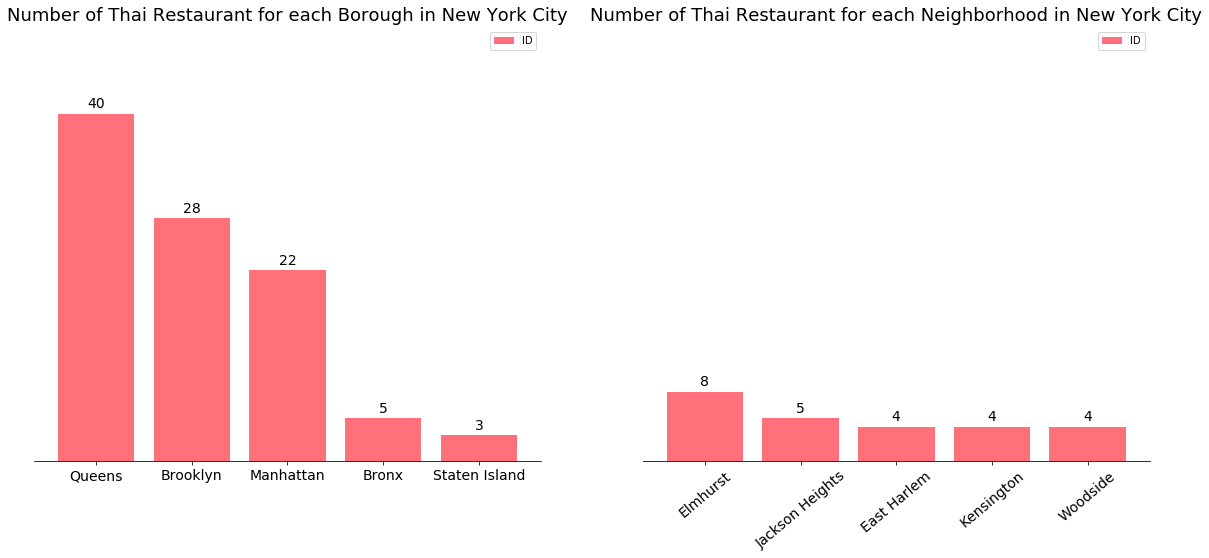

In [19]:
#set ax parameters
figsize = (20, 8)
width = 0.8
title = "Number of Thai Restaurant for each Borough in New York City"

plt.clf()
fig, axes = plt.subplots(nrows=1, ncols=2)

#Plot Borough
#Create ax
ax = df_count_res_borough.plot(kind = 'bar', figsize = figsize, width = width, color = '#FF707B', rot = 0, ax = axes[0])
ax.set_ylim(0, 50)

#Text Decoration
ax.set_title(title, fontdict = {'fontsize': 18})
ax.set_xticklabels(df_count_res_borough.index, fontdict = {'fontsize': 14})
ax.set_xlabel("")

#Borderless
ax.set_yticklabels("")
ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

for p in ax.patches:                 
    ax.annotate(
        "{}".format(p.get_height()),
        (p.get_x()+p.get_width()/2., p.get_height()), 
        ha='center',
        va='center', 
        xytext=(0, 10),
        textcoords='offset points', 
        fontsize = 14
    )

#Plot Neighborhood   
title = "Number of Thai Restaurant for each Neighborhood in New York City"    
#Create ax
ax = df_count_res_neighborhood.plot(kind = 'bar', figsize = figsize, width = width, color = '#FF707B', rot = 40, ax = axes[1])
ax.set_ylim(0, 50)

#Text Decoration
ax.set_title(title, fontdict = {'fontsize': 18})
ax.set_xticklabels(df_count_res_neighborhood.index, fontdict = {'fontsize': 14})
ax.set_xlabel("")

#Borderless
ax.set_yticklabels("")
ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

for p in ax.patches:                 
    ax.annotate(
        "{}".format(p.get_height()),
        (p.get_x()+p.get_width()/2., p.get_height()), 
        ha='center',
        va='center', 
        xytext=(0, 10),
        textcoords='offset points', 
        fontsize = 14
    )

plt.show()

we see that **Queens** has the most number of Thai restaurants and **Elmgurst Neighborhood** also has the most Thai restaurants.

### **Part 3:** Gathering additional information about the Thai Restaurant for each neighborhood from FoursquareAPI<a name="part3"></a>

In [21]:
# prepare neighborhood list that contains Thai resturants
column_names=['Borough', 'Neighborhood', 'ID', 'Name', 'Venue_lat', 'Venue_lng', 'Likes', 'Rating', 'Tips', 'Price_message', 'Price_tier']
Thai_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in Thai_rest_ny.values.tolist():
    Borough, Neighborhood, ID, Name, Category, Venue_lat, Venue_lng = row
    try:
        venue_details = get_venue_details(ID)
        print(venue_details)
        id, name, likes, rating, tips, price_message, price_tier = venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print(f'({count}/{len(Thai_rest_ny)}), done')
    Thai_rest_stats_ny = Thai_rest_stats_ny.append({'Borough': Borough,
                                                    'Neighborhood': Neighborhood, 
                                                    'ID': id,
                                                    'Name' : name,
                                                    'Venue_lat' : Venue_lat,
                                                    'Venue_lng' : Venue_lng,
                                                    'Likes' : likes,
                                                    'Rating' : rating,
                                                    'Tips' : tips,
                                                    'Price_message': price_message,
                                                    'Price_tier': price_tier
                                                   }, ignore_index=True)
    count+=1

KeyError: 'venue'

In [ ]:
#Thai_rest_stats_ny.to_csv('thai_rest_stats_ny.csv')

In [24]:
Thai_rest_stats_ny = pd.read_csv('thai_rest_stats_ny.csv', index_col = 0)

In [25]:
Thai_rest_stats_ny.head()

Borough  Neighborhood                        ID                   Name  \
0      Bronx     Riverdale  4b94a4a2f964a520787f34e3               Nam Thai   
1  Manhattan   Marble Hill  4a739e29f964a520f5dc1fe3            Siam Square   
2      Bronx  Country Club  4b4c90d3f964a52046b626e3  Honey's Thai Pavilion   
3      Bronx   Parkchester  5585c948498e0bd8a8a706f1           Thai Cuisine   
4      Bronx    Pelham Bay                         0                      0   

   Venue_lat  Venue_lng  Likes  Rating  Tips Price_message  Price_tier  
0  40.886388 -73.910025      3     7.1     5      Moderate           2  
1  40.878796 -73.916701     15     7.3    13      Moderate           2  
2  40.847845 -73.831320     19     7.3    27         Cheap           1  
3  40.838048 -73.863917     17     7.2     1      Moderate           2  
4  40.851395 -73.843658      0     0.0     0      Moderate           2

In [26]:
Thai_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Borough        99 non-null     object 
 1   Neighborhood   99 non-null     object 
 2   ID             99 non-null     object 
 3   Name           99 non-null     object 
 4   Venue_lat      99 non-null     float64
 5   Venue_lng      99 non-null     float64
 6   Likes          99 non-null     int64  
 7   Rating         99 non-null     float64
 8   Tips           99 non-null     int64  
 9   Price_message  99 non-null     object 
 10  Price_tier     99 non-null     int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 9.3+ KB


In [27]:
Thai_rest_stats_ny[Thai_rest_stats_ny.ID == '0'].shape[0]

6

There is 6 restauratants that I cannot retrieve additional information

Let's drop that 6 rows

In [28]:
Thai_rest_stats_ny.drop(Thai_rest_stats_ny.loc[Thai_rest_stats_ny['ID'] == '0'].index, inplace=True)

#### Convert object columns into float for further analysis

In [29]:
Thai_rest_stats_ny['Likes'] = Thai_rest_stats_ny['Likes'].astype('float64')
Thai_rest_stats_ny['Rating'] = Thai_rest_stats_ny['Rating'].astype('float64')
Thai_rest_stats_ny['Tips'] = Thai_rest_stats_ny['Tips'].astype('float64')
Thai_rest_stats_ny['Price_tier'] = Thai_rest_stats_ny['Price_tier'].astype('float64')
Thai_rest_stats_ny.describe()

Venue_lat  Venue_lng       Likes     Rating        Tips  Price_tier
count  93.000000  93.000000   93.000000  93.000000   93.000000   93.000000
mean   40.730355 -73.931024   98.763441   8.078495   35.849462    1.913978
std     0.056323   0.070761  153.280816   0.742916   54.916131    0.350649
min    40.590823 -74.157463    3.000000   6.200000    1.000000    1.000000
25%    40.692654 -73.976934   16.000000   7.600000    6.000000    2.000000
50%    40.742850 -73.944202   31.000000   8.200000   12.000000    2.000000
75%    40.761291 -73.887552   87.000000   8.600000   34.000000    2.000000
max    40.886388 -73.721676  766.000000   9.400000  358.000000    3.000000

In [30]:
Thai_rest_stats_ny[['ID', 'Venue_lat', 'Venue_lng']]

ID  Venue_lat  Venue_lng
0   4b94a4a2f964a520787f34e3  40.886388 -73.910025
1   4a739e29f964a520f5dc1fe3  40.878796 -73.916701
2   4b4c90d3f964a52046b626e3  40.847845 -73.831320
3   5585c948498e0bd8a8a706f1  40.838048 -73.863917
6   50e8d45ae4b06202fbe39b08  40.623236 -74.028173
..                       ...        ...        ...
94  57c169e3498e784947e307aa  40.725861 -73.992533
95  4afca7e0f964a520d02422e3  40.757275 -73.968541
96  49cfd074f964a520ce5a1fe3  40.743142 -73.954021
97  57e83df3498eebbe238cb36f  40.739118 -73.990579
98  4bf5e3f05e800f472e80e6d4  40.744550 -73.915196

[93 rows x 3 columns]

### **Part 3:** Gathering additional information about the **Nearby** Venues for each Thai Restaurant from FoursquareAPI<a name="part3"></a>

In [31]:
def get_nearby_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=50
    CLIENT_ID = 'RZDYH51XGA4ZLDY3HLI5UWLNWEKUMMLKGYABRT2CGO12XCBZ' # changed my Foursquare ID
    CLIENT_SECRET = '4ZPM33XMBRGDBG4KWJZJ2VS5CXDGYGAVGWJ2QS3QSRDPGLWE' # changed Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    print("done")
    return df

#### Collect Nearby restaurant data.

In [32]:
# prepare Thai restaurant data list that contains Thai resturants
column_names=['Thai_res_id', 'ID','Name', 'Category']
nearby_thai_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in Thai_rest_stats_ny[['ID', 'Name', 'Venue_lat', 'Venue_lng']].values.tolist():
    thai_res_id, name, Latitude, Longitude = row
    venues = get_nearby_venues(Latitude, Longitude)
    nearby_restaurant = venues[venues['ID'] != thai_res_id]   
    print(f'({count}/{len(Thai_rest_stats_ny)}) Nearby restaurant {name}: {str(len(nearby_restaurant))}')
    for resturant_detail in nearby_restaurant.values.tolist():
        id, name, category = resturant_detail
        nearby_thai_rest_ny = nearby_thai_rest_ny.append({
                                                        'Thai_res_id' : thai_res_id,
                                                        'ID': id,
                                                        'Name' : name,
                                                        'Category' : category
                                                           }, ignore_index=True)
    count+=1

done
(1/93) Nearby restaurant Nam Thai: 49
done
(2/93) Nearby restaurant Siam Square: 49
done
(3/93) Nearby restaurant Honey's Thai Pavilion: 49
done
(4/93) Nearby restaurant Thai Cuisine: 49


KeyboardInterrupt: 

In [ ]:
#nearby_thai_rest_ny.to_csv('nearby_thai_rest_ny.csv')

In [33]:
nearby_thai_rest_ny = pd.read_csv('nearby_thai_rest_ny.csv', index_col = 0)

In [34]:
nearby_thai_rest_ny.head()

Thai_res_id                        ID  \
0  4b94a4a2f964a520787f34e3  503cfaffe4b066d39de5005a   
1  4b94a4a2f964a520787f34e3  4b7993cbf964a520c8022fe3   
2  4b94a4a2f964a520787f34e3  590e5d2ce96d0c61de2dcf1d   
3  4b94a4a2f964a520787f34e3  4b0b311af964a520642e23e3   
4  4b94a4a2f964a520787f34e3  4f653ac0e4b0bf1012abaf2d   

                       Name             Category  
0  Aoyu Japanese Restaurant  Japanese Restaurant  
1     Liebman's Kosher Deli        Deli / Bodega  
2             Cocina Chente   Mexican Restaurant  
3           Palace of Japan  Japanese Restaurant  
4                 Tin Marin     Tapas Restaurant

#### Pivoting the table to better understand the data by crimes per borough

In [35]:
nearby_thai_rest_ny.groupby(['Thai_res_id', 'Category']).count()['Name'].sort_values(ascending = False)

nearby_thai_rest_cat = pd.pivot_table(nearby_thai_rest_ny,
                               values=['Name'],
                               index=['Thai_res_id'],
                               columns=['Category'],
                               aggfunc=len,
                               fill_value=0)

nearby_thai_rest_cat

Name                     \
Category                 Afghan Restaurant African Restaurant   
Thai_res_id                                                     
3fd66200f964a5204ef11ee3                 0                  0   
4112ca00f964a520ed0b1fe3                 0                  0   
42951180f964a52045241fe3                 0                  0   
453f6ce3f964a520353c1fe3                 0                  0   
457d4c15f964a5201a3f1fe3                 0                  0   
...                                    ...                ...   
5d4f31a92ada380008a49b7f                 0                  0   
5dd9e8cf2e6b8600081ec98d                 0                  0   
5df175e82276e2000744dc8b                 0                  0   
5e46e2ec5791a10008c55728                 0                  0   
5ee66a36459579000887cd2b                 0                  0   

                                                                          \
Category                 American Restaurant Animal Shelter Antique Shop   
Thai_res_id                                                                
3fd66200f964a5204ef11ee3                   3              0            0   
4112ca00f964a520ed0b1fe3                   1              0            0   
42951180f964a52045241fe3                   3              0            0   
453f6ce3f964a520353c1fe3                   2              0            0   
457d4c15f964a5201a3f1fe3                   0              0            0   
...                                      ...            ...          ...   
5d4f31a92ada380008a49b7f                   2              0            0   
5dd9e8cf2e6b8600081ec98d                   0              0            1   
5df175e82276e2000744dc8b                   1              0            0   
5e46e2ec5791a10008c55728                   0              0            0   
5ee66a36459579000887cd2b                   0              0            0   

                                                                         \
Category                 Arcade Arepa Restaurant Argentinian Restaurant   
Thai_res_id                                                               
3fd66200f964a5204ef11ee3      0                1                      0   
4112ca00f964a520ed0b1fe3      0                0                      0   
42951180f964a52045241fe3      0                0                      0   
453f6ce3f964a520353c1fe3      0                0                      0   
457d4c15f964a5201a3f1fe3      0                0                      0   
...                         ...              ...                    ...   
5d4f31a92ada380008a49b7f      0                0                      0   
5dd9e8cf2e6b8600081ec98d      0                0                      0   
5df175e82276e2000744dc8b      0                1                      0   
5e46e2ec5791a10008c55728      0                0                      0   
5ee66a36459579000887cd2b      0                0                      0   

                                                 ...                   \
Category                 Art Gallery Art Museum  ... Video Game Store   
Thai_res_id                                      ...                    
3fd66200f964a5204ef11ee3           0          0  ...                0   
4112ca00f964a520ed0b1fe3           0          0  ...                0   
42951180f964a52045241fe3           0          0  ...                0   
453f6ce3f964a520353c1fe3           0          0  ...                0   
457d4c15f964a5201a3f1fe3           0          0  ...                0   
...                              ...        ...  ...              ...   
5d4f31a92ada380008a49b7f           0          0  ...                0   
5dd9e8cf2e6b8600081ec98d           1          0  ...                0   
5df175e82276e2000744dc8b           1          0  ...                0   
5e46e2ec5791a10008c55728           1          0  ...                0   
5ee66a36459579000887cd2b           0          0  ...          

#### One Hot Encoding to Analyze Each Restaurant

In [36]:
# one hot encoding
nyc_onehot = pd.get_dummies(nearby_thai_rest_ny[['Category']], prefix="", prefix_sep="")

# add restaurant column back to dataframe
nyc_onehot['Thai_res_id'] = nearby_thai_rest_ny['Thai_res_id'] 

# move restaurant column to the first column
fixed_columns = [nyc_onehot.columns[-1]] + list(nyc_onehot.columns[:-1])
nyc_onehot = nyc_onehot[fixed_columns]

nyc_onehot.head()

Thai_res_id  Afghan Restaurant  African Restaurant  \
0  4b94a4a2f964a520787f34e3                  0                   0   
1  4b94a4a2f964a520787f34e3                  0                   0   
2  4b94a4a2f964a520787f34e3                  0                   0   
3  4b94a4a2f964a520787f34e3                  0                   0   
4  4b94a4a2f964a520787f34e3                  0                   0   

   American Restaurant  Animal Shelter  Antique Shop  Arcade  \
0                    0               0             0       0   
1                    0               0             0       0   
2                    0               0             0       0   
3                    0               0             0       0   
4                    0               0             0       0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  ...  \
0                 0                       0            0  ...   
1                 0                       0            0  ...   
2                 0                       0            0  ...   
3                 0                       0            0  ...   
4                 0                       0            0  ...   

   Video Game Store  Video Store  Vietnamese Restaurant  Warehouse Store  \
0                 0            0                      0                0   
1                 0            0                      0                0   
2                 0            0                      0                0   
3                 0            0                      0                0   
4                 0            0                      0                0   

   Whisky Bar  Wine Bar  Wine Shop  Wings Joint  Women's Store  Yoga Studio  
0           0         0          0            0              0            0  
1           0         0          0            0              0            0  
2           0         0          0            0              0            0  
3           0         0          0            0              0            0  
4           0         0          0            0              0            0  

[5 rows x 305 columns]

In [37]:
nyc_grouped = nyc_onehot.groupby('Thai_res_id').mean().reset_index()
nyc_grouped

Thai_res_id  Afghan Restaurant  African Restaurant  \
0   3fd66200f964a5204ef11ee3                0.0                 0.0   
1   4112ca00f964a520ed0b1fe3                0.0                 0.0   
2   42951180f964a52045241fe3                0.0                 0.0   
3   453f6ce3f964a520353c1fe3                0.0                 0.0   
4   457d4c15f964a5201a3f1fe3                0.0                 0.0   
..                       ...                ...                 ...   
88  5d4f31a92ada380008a49b7f                0.0                 0.0   
89  5dd9e8cf2e6b8600081ec98d                0.0                 0.0   
90  5df175e82276e2000744dc8b                0.0                 0.0   
91  5e46e2ec5791a10008c55728                0.0                 0.0   
92  5ee66a36459579000887cd2b                0.0                 0.0   

    American Restaurant  Animal Shelter  Antique Shop  Arcade  \
0              0.061224             0.0      0.000000     0.0   
1              0.020408             0.0      0.000000     0.0   
2              0.061224             0.0      0.000000     0.0   
3              0.040816             0.0      0.000000     0.0   
4              0.000000             0.0      0.000000     0.0   
..                  ...             ...           ...     ...   
88             0.040816             0.0      0.000000     0.0   
89             0.000000             0.0      0.020408     0.0   
90             0.020408             0.0      0.000000     0.0   
91             0.000000             0.0      0.000000     0.0   
92             0.000000             0.0      0.000000     0.0   

    Arepa Restaurant  Argentinian Restaurant  Art Gallery  ...  \
0           0.020408                     0.0     0.000000  ...   
1           0.000000                     0.0     0.000000  ...   
2           0.000000                     0.0     0.000000  ...   
3           0.000000                     0.0     0.000000  ...   
4           0.000000                     0.0     0.000000  ...   
..               ...                     ...          ...  ...   
88          0.000000                     0.0     0.000000  ...   
89          0.000000                     0.0     0.020408  ...   
90          0.020408                     0.0     0.020408  ...   
91          0.000000                     0.0     0.020408  ...   
92          0.000000                     0.0     0.000000  ...   

    Video Game Store  Video Store  Vietnamese Restaurant  Warehouse Store  \
0                0.0          0.0               0.020408              0.0   
1                0.0          0.0               0.020408              0.0   
2                0.0          0.0               0.000000              0.0   
3                0.0          0.0               0.000000              0.0   
4                0.0          0.0               0.000000              0.0   
..               ...          ...                    ...              ...   
88               0.0          0.0               0.000000              0.0   
89               0.0          0.0               0.000000              0.0   
90               0.0          0.0               0.000000              0.0   
91               0.0          0.0               0.000000              0.0   
92               0.0          0.0               0.000000              0.0   

    Whisky Bar  Wine Bar  Wine Shop  Wings Joint  Women's Store  Yoga Studio  
0          0.0  0.000000   0.000000     0.000000       0.000000     0.000000  
1          0.0  0.020408   0.020408     0.000000       0.000000     0.000000  
2          0.0  0.040816   0.020408     0.000000       0.000000     0.040816  
3          0.0  0.020408   0.020408     0.020408       0.000000     0.020408  
4          0.0  0.000000   0.000000     0.000000       0.020408     0.020408  
..         ...       ...        ...          ...            ...          ...  
88         0.0  0.000000   0.040816     0.000000       0.000000     0.020408  
89         0.0  0.000000   0.0612

#### Let's print each restaurant along with the top 3 most common venues

In [38]:
num_top_venues = 3

for res in nyc_grouped['Thai_res_id']:
    print("----"+res+"----")
    temp = nyc_grouped[nyc_grouped['Thai_res_id'] == res].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----3fd66200f964a5204ef11ee3----
               venue  freq
0  Indian Restaurant  0.12
1         Food Truck  0.10
2             Bakery  0.10


----4112ca00f964a520ed0b1fe3----
          venue  freq
0        Bakery  0.10
1  Cocktail Bar  0.08
2    Bagel Shop  0.06


----42951180f964a52045241fe3----
                 venue  freq
0  American Restaurant  0.06
1          Coffee Shop  0.06
2       Ice Cream Shop  0.06


----453f6ce3f964a520353c1fe3----
                 venue  freq
0          Coffee Shop  0.06
1  American Restaurant  0.04
2                  Bar  0.04


----457d4c15f964a5201a3f1fe3----
              venue  freq
0  Greek Restaurant  0.08
1     Deli / Bodega  0.08
2  Sushi Restaurant  0.06


----46b1ef0df964a520a0491fe3----
              venue  freq
0            Bakery  0.08
1       Yoga Studio  0.04
2  Sushi Restaurant  0.04


----476f8da1f964a520044d1fe3----
         venue  freq
0  Yoga Studio  0.08
1         Pier  0.04
2          Gym  0.04


----49cfd074f964a520ce5a1fe3----
  

#### Now let's create the new dataframe and display the top 10 nearby venues for each restaurant.

First, let's write a function to sort the venues in descending order.

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [40]:
num_top_venues = 10

#for column such as 1st 2nd 3rd 4th ...
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Thai_res_id']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
nearby_venues_sorted = pd.DataFrame(columns=columns)
nearby_venues_sorted['Thai_res_id'] = nyc_grouped['Thai_res_id']

for ind in np.arange(nyc_grouped.shape[0]):
    nearby_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_grouped.iloc[ind, :], num_top_venues)

nearby_venues_sorted.head()

Thai_res_id 1st Most Common Venue 2nd Most Common Venue  \
0  3fd66200f964a5204ef11ee3     Indian Restaurant            Food Truck   
1  4112ca00f964a520ed0b1fe3                Bakery          Cocktail Bar   
2  42951180f964a52045241fe3           Coffee Shop   American Restaurant   
3  453f6ce3f964a520353c1fe3           Coffee Shop                   Bar   
4  457d4c15f964a5201a3f1fe3         Deli / Bodega      Greek Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                Bakery   American Restaurant   Filipino Restaurant   
1            Bagel Shop          Optical Shop                   Bar   
2        Ice Cream Shop           Yoga Studio           Pizza Place   
3                  Park   American Restaurant                Bakery   
4      Sushi Restaurant                Bakery            Bagel Shop   

  6th Most Common Venue      7th Most Common Venue 8th Most Common Venue  \
0         Grocery Store  Latin American Restaurant       Thai Restaurant   
1           Coffee Shop               Dessert Shop             Gift Shop   
2                   Bar          Indian Restaurant                Bakery   
3                  Café               Cocktail Bar    Seafood Restaurant   
4                   Bar         Italian Restaurant          Gourmet Shop   

  9th Most Common Venue 10th Most Common Venue  
0    Tibetan Restaurant                    Pub  
1  Gym / Fitness Center   Kitchen Supply Store  
2                  Café               Wine Bar  
3  Caribbean Restaurant            Yoga Studio  
4           Salad Place         Sandwich Place

### **Part 4**: Creating a new consolidated dataset of the IBM New York Dataset, along with their thai restaurant, restaurant detail and the nearby restaruants.<a name="part4"></a> 

In [41]:
thai_res_nyc_merged = Thai_rest_stats_ny.copy()

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
thai_res_nyc_merged = thai_res_nyc_merged.merge(nearby_venues_sorted, left_on = 'ID', right_on = 'Thai_res_id')

#order columns
cols_name = thai_res_nyc_merged.columns.to_list()
cols_order = [2, 3, 0, 1]
cols_order.extend(range(4, thai_res_nyc_merged.shape[1]))
cols_name[:] = [cols_name[i] for i in cols_order]
thai_res_nyc_merged = thai_res_nyc_merged[cols_name]
thai_res_nyc_merged.drop(columns = ['Thai_res_id'], inplace = True)

thai_res_nyc_merged.head() # check the last columns!

ID                   Name    Borough  Neighborhood  \
0  4b94a4a2f964a520787f34e3               Nam Thai      Bronx     Riverdale   
1  4a739e29f964a520f5dc1fe3            Siam Square  Manhattan   Marble Hill   
2  4b4c90d3f964a52046b626e3  Honey's Thai Pavilion      Bronx  Country Club   
3  5585c948498e0bd8a8a706f1           Thai Cuisine      Bronx   Parkchester   
4  50e8d45ae4b06202fbe39b08               Top Thai   Brooklyn     Bay Ridge   

   Venue_lat  Venue_lng  Likes  Rating  Tips Price_message  ...  \
0  40.886388 -73.910025    3.0     7.1   5.0      Moderate  ...   
1  40.878796 -73.916701   15.0     7.3  13.0      Moderate  ...   
2  40.847845 -73.831320   19.0     7.3  27.0         Cheap  ...   
3  40.838048 -73.863917   17.0     7.2   1.0      Moderate  ...   
4  40.623236 -74.028173   14.0     7.2  11.0      Moderate  ...   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0            Pizza Place    Mexican Restaurant                 Diner   
1             Donut Shop           Pizza Place                  Park   
2     Italian Restaurant        Sandwich Place                  Bank   
3            Pizza Place            Donut Shop   American Restaurant   
4                    Spa           Pizza Place        Cosmetics Shop   

       4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0                        Bar           Coffee Shop   Japanese Restaurant   
1                Coffee Shop        Sandwich Place         Deli / Bodega   
2          Convenience Store                Bakery              Pharmacy   
3  Latin American Restaurant     Mobile Phone Shop           Supermarket   
4  Middle Eastern Restaurant      Greek Restaurant                Bakery   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0                  Bank        Sandwich Place            Bagel Shop   
1             Wine Shop              Pharmacy                   Gym   
2            Donut Shop           Pizza Place              Dive Bar   
3           Coffee Shop            Kids Store                   Bar   
4   Japanese Restaurant    Italian Restaurant              Tea Room   

  10th Most Common Venue  
0           Burger Joint  
1     Mexican Restaurant  
2                    Gym  
3                   Bank  
4             Taco Place  

[5 rows x 21 columns]

## 3. Methodology<a name="methodology"></a>

Categorized the methodologysection into two parts:

- [**Exploratory Data Analysis**:](#eda) Visualise the restuarants repots in different New York boroughs to idenity where is the best place to open Thai restuarant. 


- [**Modelling**:](#mdl) To help stakeholders choose the right neighborhood within a borough we will be clustering similar neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size. We will use K-Means clustering to address this problem so as to group data based on existing venues which will help in the decision making process.

###  Exploratory Data Analysis<a name="eda"></a>

In [42]:
thai_res_nyc_merged.head()

ID                   Name    Borough  Neighborhood  \
0  4b94a4a2f964a520787f34e3               Nam Thai      Bronx     Riverdale   
1  4a739e29f964a520f5dc1fe3            Siam Square  Manhattan   Marble Hill   
2  4b4c90d3f964a52046b626e3  Honey's Thai Pavilion      Bronx  Country Club   
3  5585c948498e0bd8a8a706f1           Thai Cuisine      Bronx   Parkchester   
4  50e8d45ae4b06202fbe39b08               Top Thai   Brooklyn     Bay Ridge   

   Venue_lat  Venue_lng  Likes  Rating  Tips Price_message  ...  \
0  40.886388 -73.910025    3.0     7.1   5.0      Moderate  ...   
1  40.878796 -73.916701   15.0     7.3  13.0      Moderate  ...   
2  40.847845 -73.831320   19.0     7.3  27.0         Cheap  ...   
3  40.838048 -73.863917   17.0     7.2   1.0      Moderate  ...   
4  40.623236 -74.028173   14.0     7.2  11.0      Moderate  ...   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0            Pizza Place    Mexican Restaurant                 Diner   
1             Donut Shop           Pizza Place                  Park   
2     Italian Restaurant        Sandwich Place                  Bank   
3            Pizza Place            Donut Shop   American Restaurant   
4                    Spa           Pizza Place        Cosmetics Shop   

       4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0                        Bar           Coffee Shop   Japanese Restaurant   
1                Coffee Shop        Sandwich Place         Deli / Bodega   
2          Convenience Store                Bakery              Pharmacy   
3  Latin American Restaurant     Mobile Phone Shop           Supermarket   
4  Middle Eastern Restaurant      Greek Restaurant                Bakery   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0                  Bank        Sandwich Place            Bagel Shop   
1             Wine Shop              Pharmacy                   Gym   
2            Donut Shop           Pizza Place              Dive Bar   
3           Coffee Shop            Kids Store                   Bar   
4   Japanese Restaurant    Italian Restaurant              Tea Room   

  10th Most Common Venue  
0           Burger Joint  
1     Mexican Restaurant  
2                    Gym  
3                   Bank  
4             Taco Place  

[5 rows x 21 columns]

In [43]:
from folium import plugins


# create map and display it
thai_rest_ny_map = folium.Map(location=[40.71306007524032, -73.94420151920066], zoom_start=11)


# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(thai_rest_ny_map)

# loop through the 100 crimes and add each to the map
for lat, lng, rating, price_message  in zip(thai_res_nyc_merged.Venue_lat, thai_res_nyc_merged.Venue_lng, thai_res_nyc_merged.Rating, thai_res_nyc_merged.Price_message):
    label = f'{lat}<br>{lng}<br>rating: {rating}<br>price:  {price_message}'
    folium.features.CircleMarker(
        [lat, lng],
        radius=7, # define how big you want the circle markers to be
        color='white',
        fill=True,
        popup=label,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(incidents)
    
ls = folium.PolyLine([[40.74,-74.00],[40.74,-73.97],[40.77,-73.97],[40.77,-74.00],[40.74,-74.00]], color='red')
ls.add_child(folium.Popup("outline Popup on Polyline"))
ls.add_to(thai_rest_ny_map)

# show map
thai_rest_ny_map

As you can see the area I've highlighted. This is the area that lacks Thai restaurants

In [44]:
thai_res_nyc_merged.groupby(['Borough', 'Neighborhood'])[['Likes', 'Rating', 'Tips', 'Price_tier']].mean()

Likes    Rating        Tips  \
Borough       Neighborhood                                                  
Bronx         Country Club                19.000000  7.300000   27.000000   
              Parkchester                 17.000000  7.200000    1.000000   
              Riverdale                    3.000000  7.100000    5.000000   
Brooklyn      Bay Ridge                   14.000000  7.200000   11.000000   
              Brooklyn Heights           101.500000  7.650000   45.000000   
              Bushwick                    66.000000  8.700000   14.000000   
              Carroll Gardens            165.000000  8.500000   43.000000   
              Clinton Hill                51.000000  8.000000   38.000000   
              Cobble Hill                317.000000  8.200000  160.000000   
              Crown Heights               26.000000  8.500000    6.000000   
              Downtown                    42.000000  9.100000    7.000000   
              East Williamsburg          512.000000  8.700000  124.000000   
              Flatbush                    24.000000  7.500000   10.000000   
              Fort Greene                 42.000000  8.450000   16.000000   
              Kensington                  42.000000  8.300000   21.750000   
              Park Slope                 229.000000  8.100000  122.000000   
              Prospect Heights            91.000000  8.066667   22.000000   
              Prospect Lefferts Gardens   14.000000  9.000000    7.000000   
              Red Hook                    11.000000  8.400000    1.000000   
              Sunset Park                 10.000000  6.600000    9.000000   
              Williamsburg                26.000000  8.400000    6.000000   
              Windsor Terrace             23.000000  7.500000    4.000000   
Manhattan     Chinatown                   98.000000  9.350000   19.500000   
              Clinton                    547.000000  8.100000  145.000000   
              East Harlem                 11.750000  7.750000    5.250000   
              Flatiron                   427.000000  9.100000   72.000000   
              Gramercy                    22.000000  8.800000    8.500000   
              Lenox Hill                 637.000000  9.200000  163.000000   
              Manhattan Valley           213.500000  7.850000   64.500000   
              Marble Hill                 15.000000  7.300000   13.000000   
              Murray Hill                 80.000000  8.400000   31.000000   
              Noho                       448.000000  9.400000  122.000000   
              Sutton Place               387.000000  8.200000  166.000000   
              Upper East Side             88.000000  8.900000   24.000000   
              Upper West Side            201.000000  8.050000   85.000000   
              Washington Heights           7.000000  6.800000    2.000000   
              Yorkville                   27.000000  8.900000    8.000000   
Queens        Arverne                     15.000000  7.000000   11.000000   
              Astoria                     93.500000  8.500000   33.000000   
              Auburndale                   9.000000  6.500000    3.000000   
              Bayside                     31.000000  7.300000   11.500000   
              Elmhurst                    74.750000  8.362500   32.875000   
              Forest Hills                62.000000  8.700000   34.000000   
              Fresh Meadows               16.000000  8.400000    1.000000   
              Glen Oaks                    9.000000  6.700000    7.000000   
              Hunters Point              251.000000  8.500000  118.000000   
              Jackson Heights             53.200000  8.380000   20.600000   
              Jamaica Center              12.000000  6.900000    4.000000   
              Long Island City            57.000000  7.500000   13.000000   
              Ravenswood                 140.333333  8.366667   52.666667   
              Rego Park                   

In [45]:
thai_res_nyc_merged.head()

ID                   Name    Borough  Neighborhood  \
0  4b94a4a2f964a520787f34e3               Nam Thai      Bronx     Riverdale   
1  4a739e29f964a520f5dc1fe3            Siam Square  Manhattan   Marble Hill   
2  4b4c90d3f964a52046b626e3  Honey's Thai Pavilion      Bronx  Country Club   
3  5585c948498e0bd8a8a706f1           Thai Cuisine      Bronx   Parkchester   
4  50e8d45ae4b06202fbe39b08               Top Thai   Brooklyn     Bay Ridge   

   Venue_lat  Venue_lng  Likes  Rating  Tips Price_message  ...  \
0  40.886388 -73.910025    3.0     7.1   5.0      Moderate  ...   
1  40.878796 -73.916701   15.0     7.3  13.0      Moderate  ...   
2  40.847845 -73.831320   19.0     7.3  27.0         Cheap  ...   
3  40.838048 -73.863917   17.0     7.2   1.0      Moderate  ...   
4  40.623236 -74.028173   14.0     7.2  11.0      Moderate  ...   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0            Pizza Place    Mexican Restaurant                 Diner   
1             Donut Shop           Pizza Place                  Park   
2     Italian Restaurant        Sandwich Place                  Bank   
3            Pizza Place            Donut Shop   American Restaurant   
4                    Spa           Pizza Place        Cosmetics Shop   

       4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0                        Bar           Coffee Shop   Japanese Restaurant   
1                Coffee Shop        Sandwich Place         Deli / Bodega   
2          Convenience Store                Bakery              Pharmacy   
3  Latin American Restaurant     Mobile Phone Shop           Supermarket   
4  Middle Eastern Restaurant      Greek Restaurant                Bakery   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0                  Bank        Sandwich Place            Bagel Shop   
1             Wine Shop              Pharmacy                   Gym   
2            Donut Shop           Pizza Place              Dive Bar   
3           Coffee Shop            Kids Store                   Bar   
4   Japanese Restaurant    Italian Restaurant              Tea Room   

  10th Most Common Venue  
0           Burger Joint  
1     Mexican Restaurant  
2                    Gym  
3                   Bank  
4             Taco Place  

[5 rows x 21 columns]

### Cluster Neighbourhoods

#### Data preprocessing by create dataframe for clustering

In [46]:
thai_res_nyc_cluster = Thai_rest_stats_ny.copy()

# merge thai_res_nyc_cluster with nyc_grouped to add Rating and Price_tier for each restaurant
thai_res_nyc_cluster = thai_res_nyc_cluster.merge(nyc_grouped, left_on = 'ID', right_on = 'Thai_res_id')

thai_res_nyc_cluster = thai_res_nyc_cluster.drop(columns = list(thai_res_nyc_cluster.columns[i] for i in [0, 1, 2, 3, 4, 5, 6, 8, 9, 11]))

thai_res_nyc_cluster.head() # check the last columns!

Rating  Price_tier  Afghan Restaurant  African Restaurant  \
0     7.1         2.0                0.0                 0.0   
1     7.3         2.0                0.0                 0.0   
2     7.3         1.0                0.0                 0.0   
3     7.2         2.0                0.0                 0.0   
4     7.2         2.0                0.0                 0.0   

   American Restaurant  Animal Shelter  Antique Shop  Arcade  \
0             0.000000             0.0           0.0     0.0   
1             0.000000             0.0           0.0     0.0   
2             0.020408             0.0           0.0     0.0   
3             0.061224             0.0           0.0     0.0   
4             0.020000             0.0           0.0     0.0   

   Arepa Restaurant  Argentinian Restaurant  ...  Video Game Store  \
0               0.0                     0.0  ...          0.000000   
1               0.0                     0.0  ...          0.000000   
2               0.0                     0.0  ...          0.000000   
3               0.0                     0.0  ...          0.020408   
4               0.0                     0.0  ...          0.020000   

   Video Store  Vietnamese Restaurant  Warehouse Store  Whisky Bar  Wine Bar  \
0     0.000000                    0.0         0.020408         0.0       0.0   
1     0.000000                    0.0         0.000000         0.0       0.0   
2     0.020408                    0.0         0.000000         0.0       0.0   
3     0.000000                    0.0         0.000000         0.0       0.0   
4     0.000000                    0.0         0.000000         0.0       0.0   

   Wine Shop  Wings Joint  Women's Store  Yoga Studio  
0   0.020408     0.020408       0.000000     0.000000  
1   0.040816     0.000000       0.000000     0.020408  
2   0.000000     0.000000       0.000000     0.000000  
3   0.000000     0.000000       0.020408     0.000000  
4   0.000000     0.000000       0.000000     0.020000  

[5 rows x 306 columns]

#### Scaling features for _K_ Means (Rating and Price is weighted)

In [47]:
scaler = StandardScaler()
thai_res_nyc_cluster_scaled = thai_res_nyc_cluster.copy()

#Scaling two features with a standard scaler from -1 to 1
#I used standard scaler instead of min_max_scaler because I want the range of these 2 features to weighted the model.
thai_res_nyc_cluster_scaled[['Rating', 'Price_tier']] = scaler.fit_transform(thai_res_nyc_cluster[['Rating', 'Price_tier']])
thai_res_nyc_cluster_scaled.head()

Rating  Price_tier  Afghan Restaurant  African Restaurant  \
0 -1.324239    0.246651                0.0                 0.0   
1 -1.053571    0.246651                0.0                 0.0   
2 -1.053571   -2.620662                0.0                 0.0   
3 -1.188905    0.246651                0.0                 0.0   
4 -1.188905    0.246651                0.0                 0.0   

   American Restaurant  Animal Shelter  Antique Shop  Arcade  \
0             0.000000             0.0           0.0     0.0   
1             0.000000             0.0           0.0     0.0   
2             0.020408             0.0           0.0     0.0   
3             0.061224             0.0           0.0     0.0   
4             0.020000             0.0           0.0     0.0   

   Arepa Restaurant  Argentinian Restaurant  ...  Video Game Store  \
0               0.0                     0.0  ...          0.000000   
1               0.0                     0.0  ...          0.000000   
2               0.0                     0.0  ...          0.000000   
3               0.0                     0.0  ...          0.020408   
4               0.0                     0.0  ...          0.020000   

   Video Store  Vietnamese Restaurant  Warehouse Store  Whisky Bar  Wine Bar  \
0     0.000000                    0.0         0.020408         0.0       0.0   
1     0.000000                    0.0         0.000000         0.0       0.0   
2     0.020408                    0.0         0.000000         0.0       0.0   
3     0.000000                    0.0         0.000000         0.0       0.0   
4     0.000000                    0.0         0.000000         0.0       0.0   

   Wine Shop  Wings Joint  Women's Store  Yoga Studio  
0   0.020408     0.020408       0.000000     0.000000  
1   0.040816     0.000000       0.000000     0.020408  
2   0.000000     0.000000       0.000000     0.000000  
3   0.000000     0.000000       0.020408     0.000000  
4   0.000000     0.000000       0.000000     0.020000  

[5 rows x 306 columns]

#### Scaling all features for _K_ Means

In [48]:
scaler = StandardScaler()
thai_res_nyc_cluster_scaled_all_features = thai_res_nyc_cluster.copy()

#Scaling two features with a standard scaler from -1 to 1
thai_res_nyc_cluster_scaled_all_features[['Rating', 'Price_tier']] = scaler.fit_transform(thai_res_nyc_cluster_scaled_all_features[['Rating', 'Price_tier']]) * 3

cols = thai_res_nyc_cluster_scaled_all_features.drop(['Rating', 'Price_tier'], axis = 1).columns.to_list()
thai_res_nyc_cluster_scaled_all_features[cols] = scaler.fit_transform(thai_res_nyc_cluster_scaled_all_features.drop(['Rating', 'Price_tier'], axis = 1))

thai_res_nyc_cluster_scaled_all_features.head()

Rating  Price_tier  Afghan Restaurant  African Restaurant  \
0 -3.972718    0.739952          -0.104257           -0.182566   
1 -3.160712    0.739952          -0.104257           -0.182566   
2 -3.160712   -7.861987          -0.104257           -0.182566   
3 -3.566715    0.739952          -0.104257           -0.182566   
4 -3.566715    0.739952          -0.104257           -0.182566   

   American Restaurant  Animal Shelter  Antique Shop    Arcade  \
0            -0.945999          -0.212      -0.14825 -0.104257   
1            -0.945999          -0.212      -0.14825 -0.104257   
2             0.068448          -0.212      -0.14825 -0.104257   
3             2.097341          -0.212      -0.14825 -0.104257   
4             0.048159          -0.212      -0.14825 -0.104257   

   Arepa Restaurant  Argentinian Restaurant  ...  Video Game Store  \
0          -0.36626               -0.410164  ...         -0.182566   
1          -0.36626               -0.410164  ...         -0.182566   
2          -0.36626               -0.410164  ...         -0.182566   
3          -0.36626               -0.410164  ...          5.514954   
4          -0.36626               -0.410164  ...          5.401004   

   Video Store  Vietnamese Restaurant  Warehouse Store  Whisky Bar  Wine Bar  \
0    -0.181663              -0.665818         9.591663   -0.148242 -0.607692   
1    -0.181663              -0.665818        -0.104257   -0.148242 -0.607692   
2     5.056984              -0.665818        -0.104257   -0.148242 -0.607692   
3    -0.181663              -0.665818        -0.104257   -0.148242 -0.607692   
4    -0.181663              -0.665818        -0.104257   -0.148242 -0.607692   

   Wine Shop  Wings Joint  Women's Store  Yoga Studio  
0   0.040907     3.660011      -0.285291    -0.724553  
1   1.107223    -0.261655      -0.285291     0.422595  
2  -1.025408    -0.261655      -0.285291    -0.724553  
3  -1.025408    -0.261655       3.515865    -0.724553  
4  -1.025408    -0.261655      -0.285291     0.399652  

[5 rows x 306 columns]

#### Find the best _K_ with elbow method

In [49]:
# Define a function to get sum square error and idx of best point of _k_
def get_sse(dataframe):
    sse = []
    list_k = list(range(1, 10))

    for k in list_k:
        km = KMeans(n_clusters=k)
        km.fit(thai_res_nyc_cluster)
        sse.append(km.inertia_)
        
    nPoints = len(sse)
    allCoord = np.vstack((range(nPoints), sse)).T
    firstPoint = allCoord[0]
    lineVec = allCoord[-1] - allCoord[0]
    lineVecNorm = lineVec / np.sqrt(np.sum(lineVec**2))
    vecFromFirst = allCoord - firstPoint
    scalarProduct = np.sum(vecFromFirst * np.matlib.repmat(lineVecNorm, nPoints, 1), axis=1)
    vecFromFirstParallel = np.outer(scalarProduct, lineVecNorm)
    vecToLine = vecFromFirst - vecFromFirstParallel
    distToLine = np.sqrt(np.sum(vecToLine ** 2, axis=1))
    idxOfBestPoint = np.argmax(distToLine)
    
    return list_k, sse, idxOfBestPoint+1

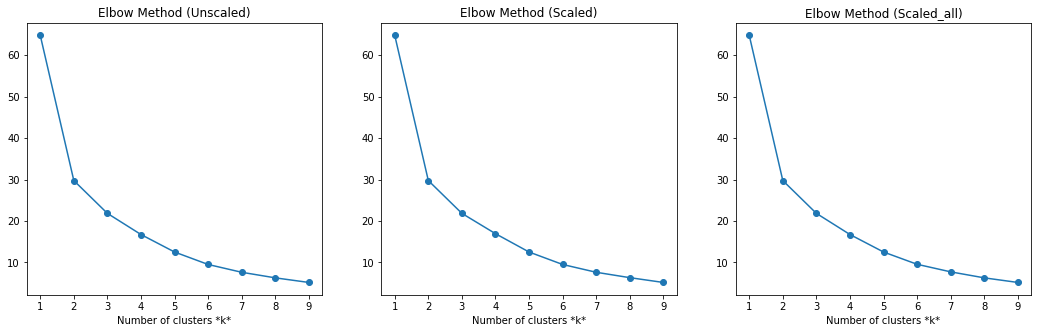

Optimum number of cluster by Elbow method on Unscaled data is 3
Optimum number of cluster by Elbow method on Scaled data is 3
Optimum number of cluster by Elbow method on Scaled all features data is 3


In [50]:
list_k_unscaled, sse_unscaled, idxOfBestPoint_unscaled = get_sse(thai_res_nyc_cluster)
list_k_scaled, see_scaled, idxOfBestPoint_scaled = get_sse(thai_res_nyc_cluster_scaled)
list_k_scaled_all, see_scaled_all, idxOfBestPoint_scaled_all = get_sse(thai_res_nyc_cluster_scaled_all_features)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18, 5)

ax1.plot(list_k_unscaled, sse_unscaled, '-o')
ax1.set_title('Elbow Method (Unscaled)')
ax1.set_xlabel(r'Number of clusters *k*')
ax1.set_label('Sum of squared distance');

ax2.plot(list_k_scaled, see_scaled, '-o')
ax2.set_title('Elbow Method (Scaled)')
ax2.set_xlabel(r'Number of clusters *k*')
ax2.set_label('Sum of squared distance');

ax3.plot(list_k_scaled_all, see_scaled_all, '-o')
ax3.set_title('Elbow Method (Scaled_all)')
ax3.set_xlabel(r'Number of clusters *k*')
ax3.set_label('Sum of squared distance');

plt.show()
print(f"Optimum number of cluster by Elbow method on Unscaled data is {idxOfBestPoint_unscaled}")
print(f"Optimum number of cluster by Elbow method on Scaled data is {idxOfBestPoint_scaled}")
print(f"Optimum number of cluster by Elbow method on Scaled all features data is {idxOfBestPoint_scaled_all}")

#### Silhouette plot on unscaled data

For n_clusters = 2 The average silhouette_score is : 0.4592030760836139
For n_clusters = 3 The average silhouette_score is : 0.36303255173062055
For n_clusters = 4 The average silhouette_score is : 0.38824608437506075
For n_clusters = 5 The average silhouette_score is : 0.38896826724205313
For n_clusters = 6 The average silhouette_score is : 0.4157611985752017


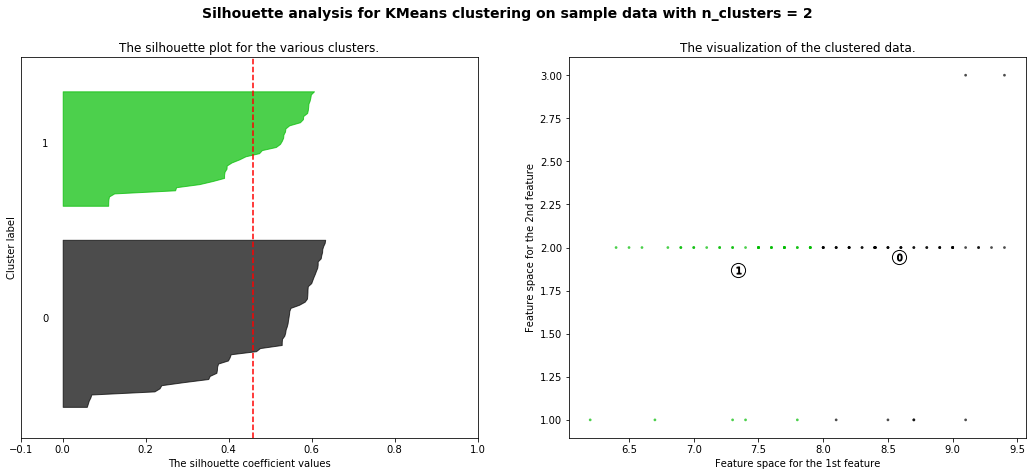

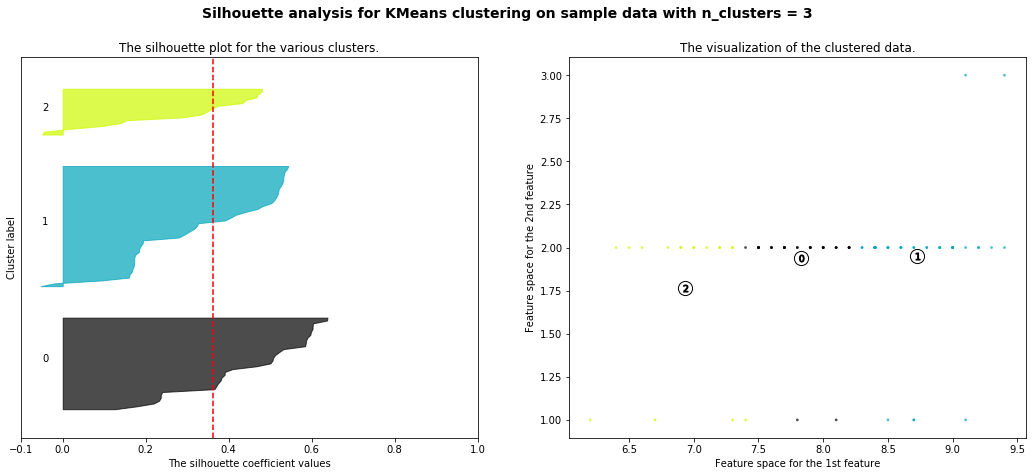

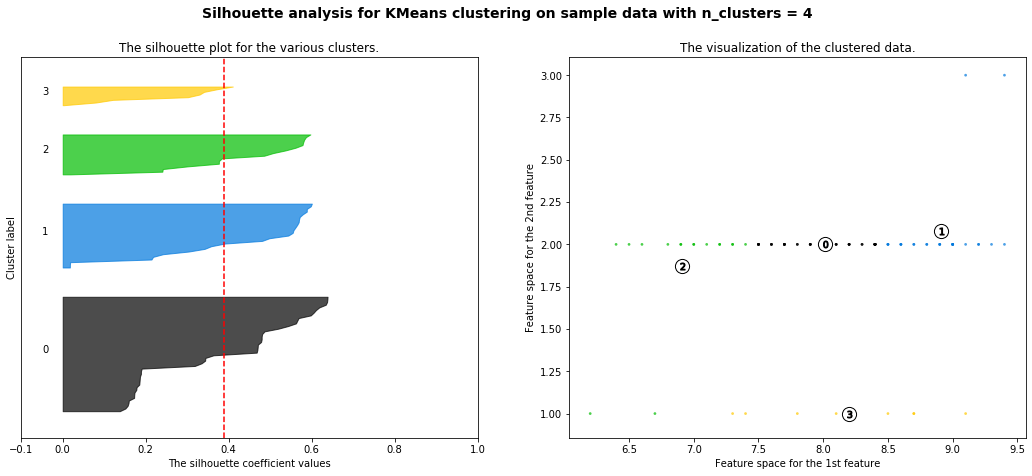

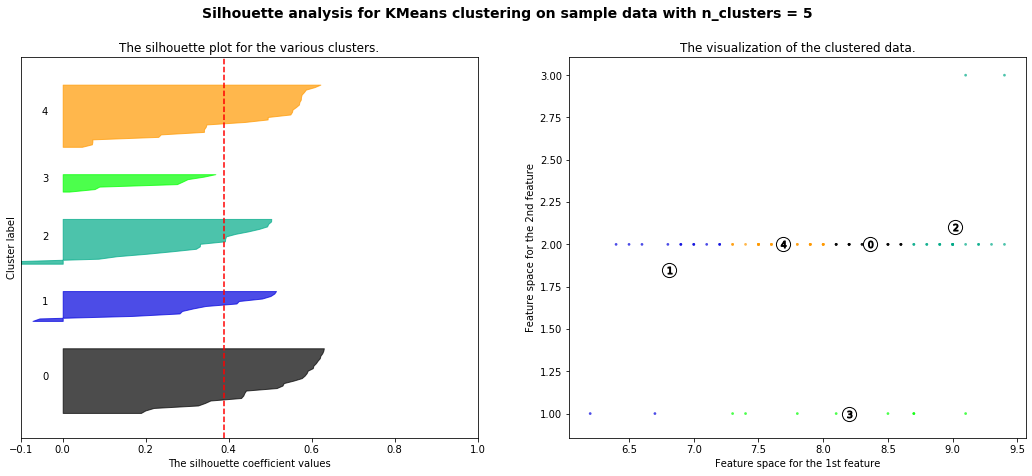

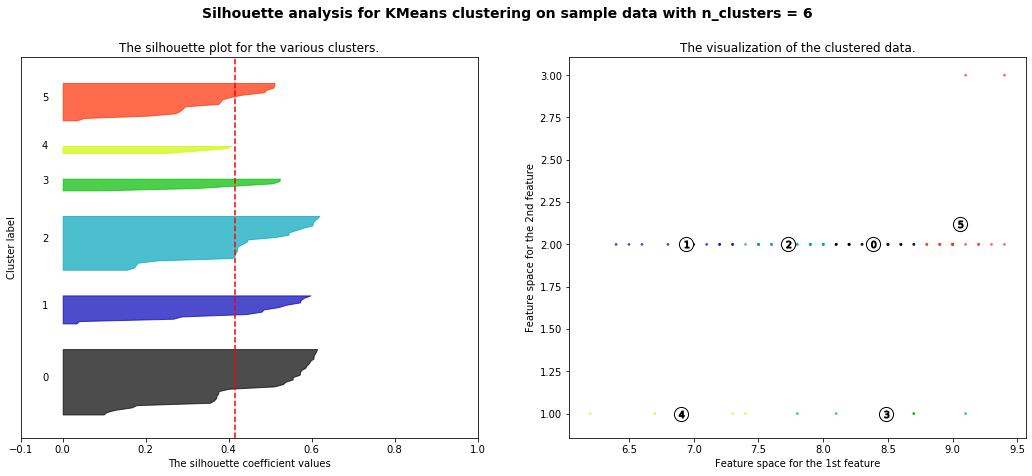

In [51]:
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(thai_res_nyc_cluster) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(thai_res_nyc_cluster)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(thai_res_nyc_cluster, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(thai_res_nyc_cluster, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors_cluster = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(thai_res_nyc_cluster.Rating.values, thai_res_nyc_cluster.Price_tier.values, marker='.', s=30, lw=0, alpha=0.7,
                c=colors_cluster, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### Silhouette plot on scaled data

For n_clusters = 2 The average silhouette_score is : 0.6215947813533674
For n_clusters = 3 The average silhouette_score is : 0.50723244516246
For n_clusters = 4 The average silhouette_score is : 0.5426377680634848
For n_clusters = 5 The average silhouette_score is : 0.4867970718175185
For n_clusters = 6 The average silhouette_score is : 0.494782143093166


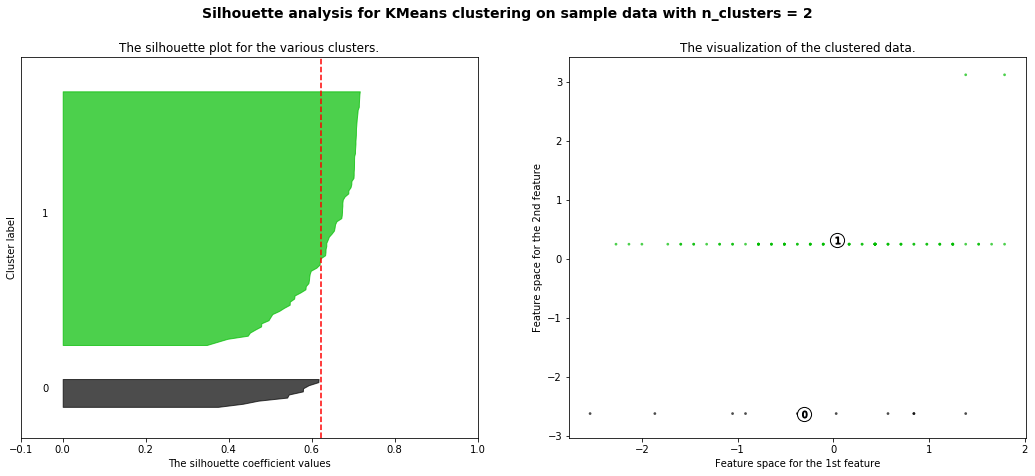

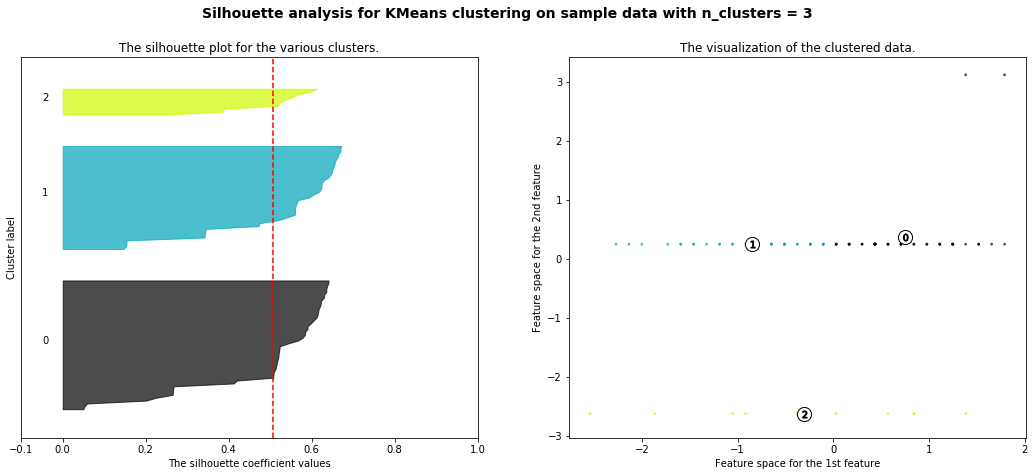

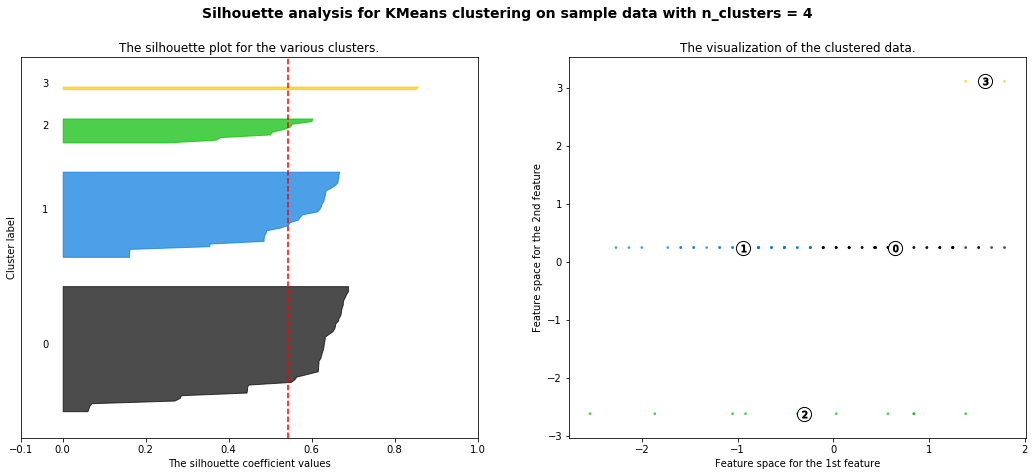

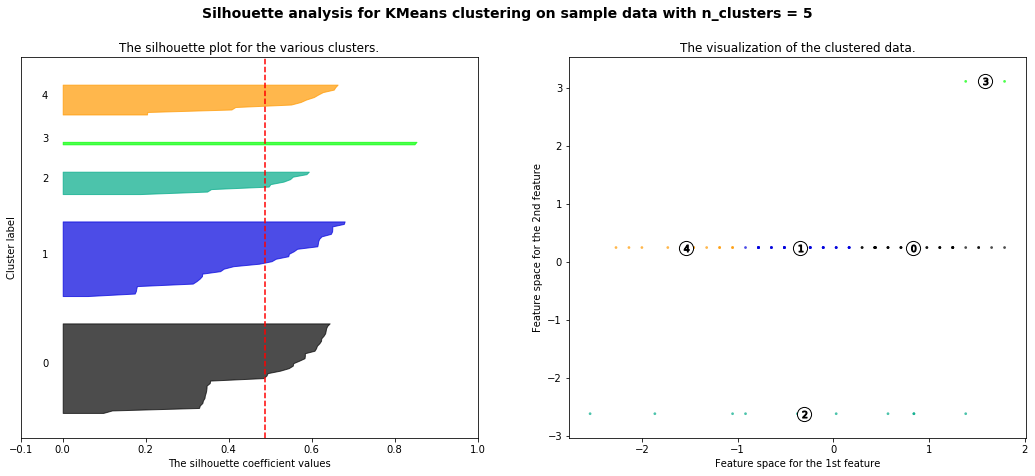

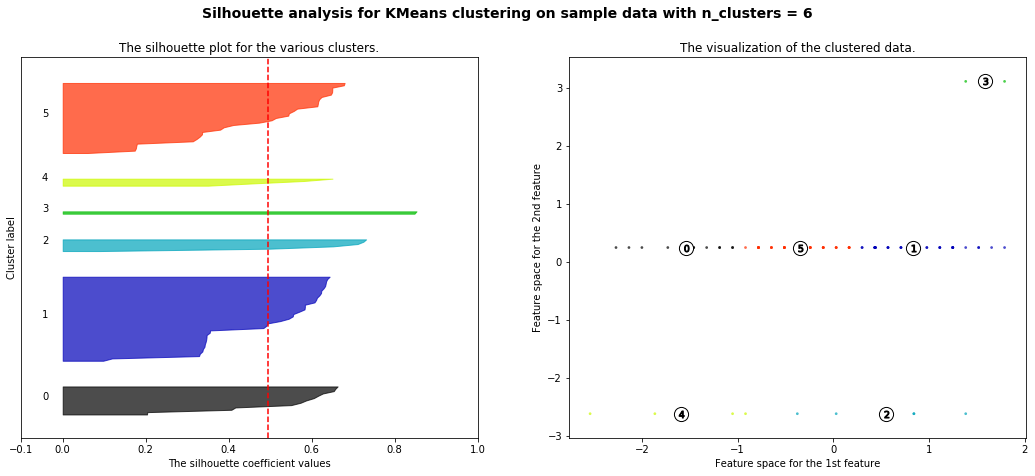

In [52]:
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(thai_res_nyc_cluster_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(thai_res_nyc_cluster_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(thai_res_nyc_cluster_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(thai_res_nyc_cluster_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors_cluster = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(thai_res_nyc_cluster_scaled.Rating.values, thai_res_nyc_cluster_scaled.Price_tier.values, marker='.', s=30, lw=0, alpha=0.7,
                c=colors_cluster, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### Silhouette plot on scaled all features data

For n_clusters = 2 The average silhouette_score is : 0.07933279484158265
For n_clusters = 3 The average silhouette_score is : -0.0126888652336783
For n_clusters = 4 The average silhouette_score is : 0.04444976730681058
For n_clusters = 5 The average silhouette_score is : 0.0001940188792290233
For n_clusters = 6 The average silhouette_score is : -0.010569736885554766


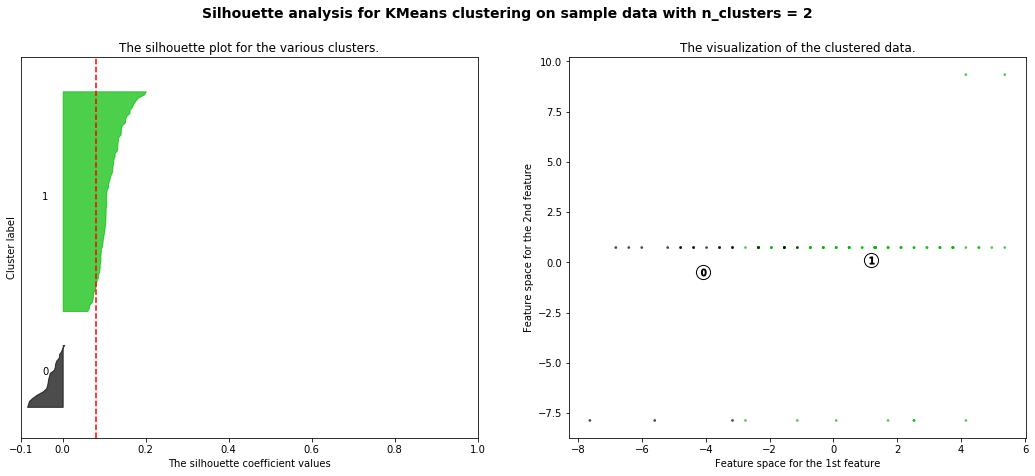

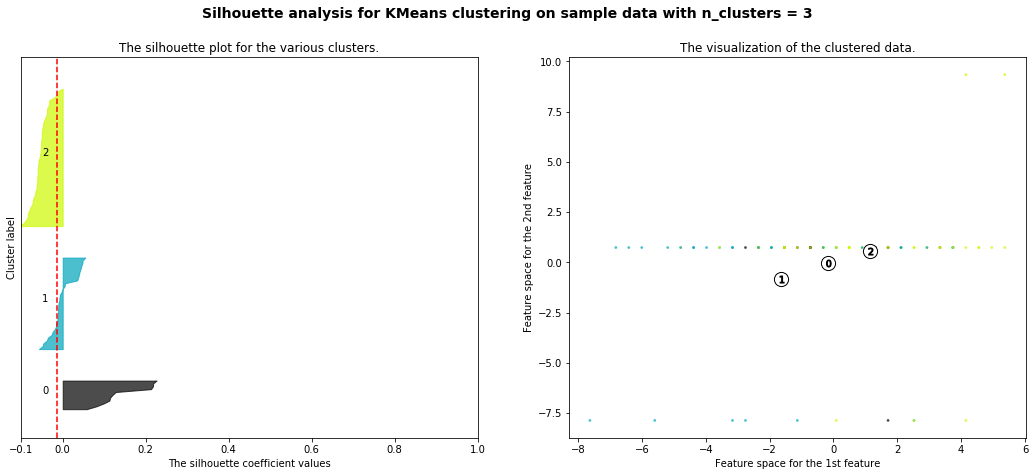

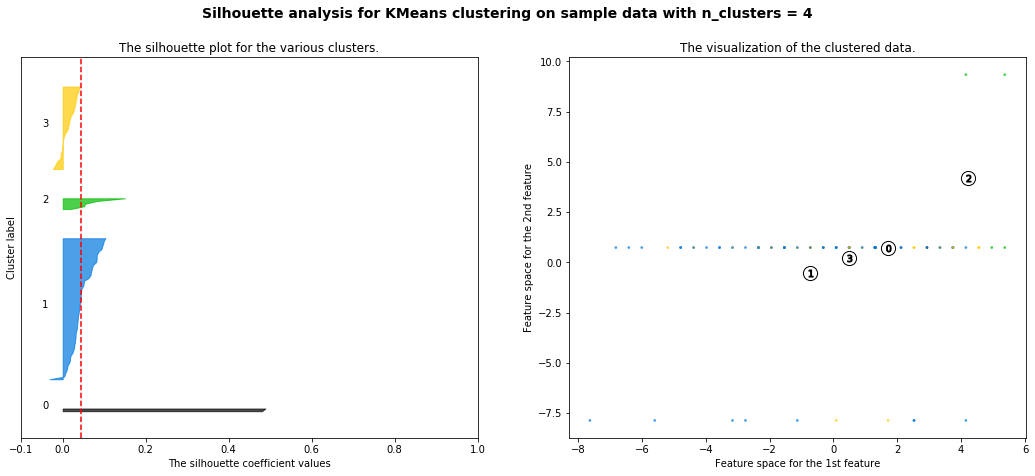

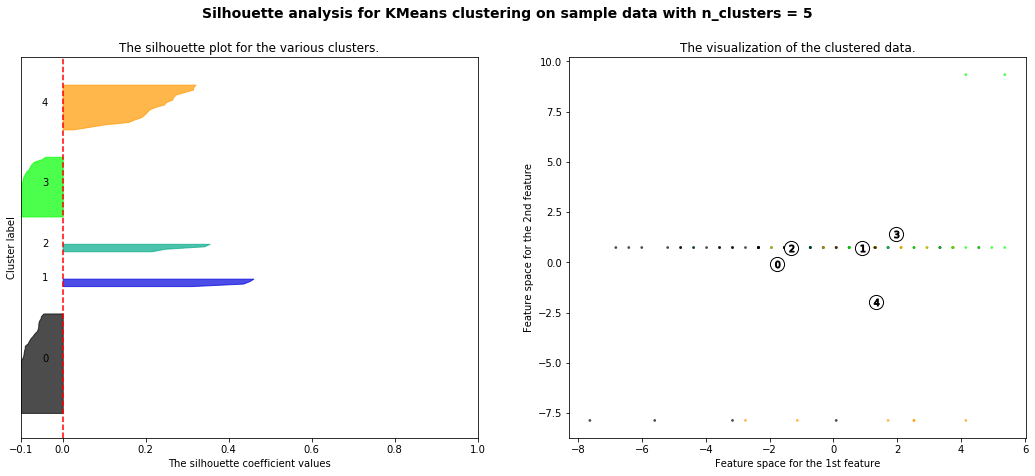

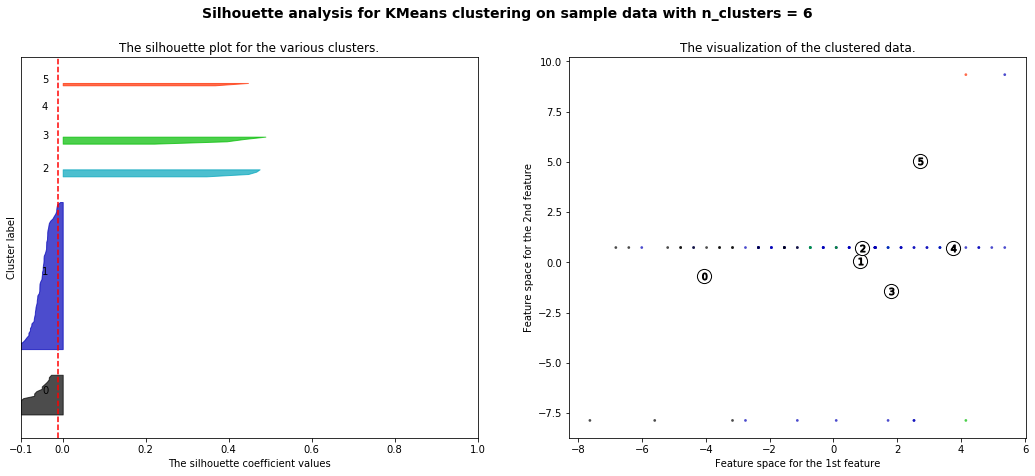

In [53]:
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(thai_res_nyc_cluster_scaled_all_features) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(thai_res_nyc_cluster_scaled_all_features)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(thai_res_nyc_cluster_scaled_all_features, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(thai_res_nyc_cluster_scaled_all_features, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors_cluster = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(thai_res_nyc_cluster_scaled_all_features.Rating.values, thai_res_nyc_cluster_scaled_all_features.Price_tier.values, marker='.', s=30, lw=0, alpha=0.7,
                c=colors_cluster, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

After we looked at the Elbow method and Silhouette plot, we found that Using **K = 4** Should produce the best understanding results

#### Clustering

In [54]:
df_for_clusting = thai_res_nyc_cluster_scaled_all_features.copy()

In [55]:
# set number of clusters
kclusters = 4


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_for_clusting)

In [56]:
# add clustering labels
thai_res_nyc_clustered = thai_res_nyc_merged.copy()

thai_res_nyc_clustered.insert(0, 'Cluster Labels', kmeans.labels_)

thai_res_nyc_clustered.head()

Cluster Labels                        ID                   Name    Borough  \
0               0  4b94a4a2f964a520787f34e3               Nam Thai      Bronx   
1               0  4a739e29f964a520f5dc1fe3            Siam Square  Manhattan   
2               0  4b4c90d3f964a52046b626e3  Honey's Thai Pavilion      Bronx   
3               0  5585c948498e0bd8a8a706f1           Thai Cuisine      Bronx   
4               1  50e8d45ae4b06202fbe39b08               Top Thai   Brooklyn   

   Neighborhood  Venue_lat  Venue_lng  Likes  Rating  Tips  ...  \
0     Riverdale  40.886388 -73.910025    3.0     7.1   5.0  ...   
1   Marble Hill  40.878796 -73.916701   15.0     7.3  13.0  ...   
2  Country Club  40.847845 -73.831320   19.0     7.3  27.0  ...   
3   Parkchester  40.838048 -73.863917   17.0     7.2   1.0  ...   
4     Bay Ridge  40.623236 -74.028173   14.0     7.2  11.0  ...   

  1st Most Common Venue  2nd Most Common Venue 3rd Most Common Venue  \
0           Pizza Place     Mexican Restaurant                 Diner   
1            Donut Shop            Pizza Place                  Park   
2    Italian Restaurant         Sandwich Place                  Bank   
3           Pizza Place             Donut Shop   American Restaurant   
4                   Spa            Pizza Place        Cosmetics Shop   

       4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0                        Bar           Coffee Shop   Japanese Restaurant   
1                Coffee Shop        Sandwich Place         Deli / Bodega   
2          Convenience Store                Bakery              Pharmacy   
3  Latin American Restaurant     Mobile Phone Shop           Supermarket   
4  Middle Eastern Restaurant      Greek Restaurant                Bakery   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0                  Bank        Sandwich Place            Bagel Shop   
1             Wine Shop              Pharmacy                   Gym   
2            Donut Shop           Pizza Place              Dive Bar   
3           Coffee Shop            Kids Store                   Bar   
4   Japanese Restaurant    Italian Restaurant              Tea Room   

  10th Most Common Venue  
0           Burger Joint  
1     Mexican Restaurant  
2                    Gym  
3                   Bank  
4             Taco Place  

[5 rows x 22 columns]

#### Visualize Cluster

In [57]:
# create map
map_clusters = folium.Map(location=[40.71306007524032, -73.94420151920066], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, rating, price, cluster in zip(thai_res_nyc_clustered['Venue_lat'], thai_res_nyc_clustered['Venue_lng'], thai_res_nyc_clustered['Rating'], thai_res_nyc_clustered['Price_message'], thai_res_nyc_clustered['Cluster Labels']):
    label = folium.Popup(f"rating: {rating} </br> price: {price}", parse_html=True)
    html="""
    <h2><center>Cluster: {0}</center></h2>
    <h4>Rating: {1}</h4>
    <h4>Price: {2}</h4>
    """.format(cluster, rating, price)
    iframe = folium.IFrame(html=html, width=170, height=135)
    popup = folium.Popup(iframe, max_width=170)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=popup,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 4. Analysis <a name="analysis"></a>

### Cluster 0

In [58]:
thai_res_nyc_clustered.loc[thai_res_nyc_clustered['Cluster Labels'] == 0, thai_res_nyc_clustered.columns[[2, 8, 10] + list(range(12, thai_res_nyc_clustered.shape[1]))]]

Name  Rating Price_message 1st Most Common Venue  \
0                   Nam Thai     7.1      Moderate           Pizza Place   
1                Siam Square     7.3      Moderate            Donut Shop   
2      Honey's Thai Pavilion     7.3         Cheap    Italian Restaurant   
3               Thai Cuisine     7.2      Moderate           Pizza Place   
33                Tung Thong     6.8      Moderate                  Café   
72    Thailand Kitchen Corp.     6.4      Moderate           Pizza Place   
76                    Thanya     6.5      Moderate      Greek Restaurant   
77   Asian Bowl Thai Cuisine     6.7         Cheap     Indian Restaurant   
78                Kin'd Thai     8.4      Moderate    Chinese Restaurant   
79                Amina Thai     6.9      Moderate        Sandwich Place   
86       Forest Thai Cuisine     7.3      Moderate    Chinese Restaurant   
87  Empire East Richmond Ave     7.5      Moderate           Pizza Place   

        2nd Most Common Venue 3rd Most Common Venue  \
0          Mexican Restaurant                 Diner   
1                 Pizza Place                  Park   
2              Sandwich Place                  Bank   
3                  Donut Shop   American Restaurant   
33                Pizza Place                  Park   
72  Latin American Restaurant         Deli / Bodega   
76                Pizza Place        Ice Cream Shop   
77                   Pharmacy          Intersection   
78                   Pharmacy           Pizza Place   
79          Mobile Phone Shop    Mexican Restaurant   
86                Pizza Place                  Bank   
87              Deli / Bodega                 Diner   

        4th Most Common Venue 5th Most Common Venue     6th Most Common Venue  \
0                         Bar           Coffee Shop       Japanese Restaurant   
1                 Coffee Shop        Sandwich Place             Deli / Bodega   
2           Convenience Store                Bakery                  Pharmacy   
3   Latin American Restaurant     Mobile Phone Shop               Supermarket   
33  Latin American Restaurant           Coffee Shop                 Wine Shop   
72                 Donut Shop   American Restaurant                  Pharmacy   
76             Cosmetics Shop              Pharmacy                      Café   
77              Grocery Store     Mobile Phone Shop                Food Truck   
78             Baseball Field         Grocery Store                    Bakery   
79                       Bank           Pizza Place      Fast Food Restaurant   
86                        Gym     Mobile Phone Shop  Mediterranean Restaurant   
87         Italian Restaurant              Pharmacy        Chinese Restaurant   

   7th Most Common Venue    8th Most Common Venue 9th Most Common Venue  \
0                   Bank           Sandwich Place            Bagel Shop   
1              Wine Shop                 Pharmacy                   Gym   
2             Donut Shop              Pizza Place              Dive Bar   
3            Coffee Shop               Kids Store                   Bar   
33         Deli / Bodega  New American Restaurant                Bakery   
72                  Bank              Supermarket   Fried Chicken Joint   
76      Sushi Restaurant     Gym / Fitness Center                Lounge   
77            Hookah Bar           Sandwich Place                School   
78                   Gym             Intersection          Tennis Court   
79        Clothing Store     Caribbean Restaurant   Fried Chicken Joint   
86     Convenience Store      Fried Chicken Joint        Ice Cream Shop   
87        Sandwich Place           Baseball Field    Tex-Mex Restaurant   

   10th Most Common Venue  
0            Burger Joint  
1      Mexican Restaurant  
2                     Gym  
3                    Bank  
33       Tapas Restaurant  
72         Sandwich Place  
76              Juice Bar  
77                   Farm  
78             Donut Shop  
79       

### Cluster 1

In [59]:
thai_res_nyc_clustered.loc[thai_res_nyc_clustered['Cluster Labels'] == 1, thai_res_nyc_clustered.columns[[2, 8, 10] + list(range(12, thai_res_nyc_clustered.shape[1]))]]

Name  Rating Price_message 1st Most Common Venue  \
4                        Top Thai     7.2      Moderate                   Spa   
6   Mondayoff By Plant Love House     7.5      Moderate    Mexican Restaurant   
7                    Ruammit Thai     8.5      Moderate           Coffee Shop   
12        Jai Dee Thai Restaurant     7.5      Moderate    Italian Restaurant   
14                           Muse     7.8      Moderate                   Bar   
15        Nourish Thai Food Oasis     7.9      Moderate             Wine Shop   
16                 Noods n’ Chill     8.4      Moderate           Coffee Shop   
17                     Klom Klorm     8.7      Moderate                   Bar   
20                           Joya     8.2      Moderate                Bakery   
21                      Ugly Baby     8.8      Moderate           Coffee Shop   
22                          Boran     8.2      Moderate           Coffee Shop   
24                      Thaiholic     8.6      Moderate    Italian Restaurant   
25               Ace Thai Kitchen     8.3      Moderate    Italian Restaurant   
26     Song Thai Restaurant & Bar     8.1         Cheap           Coffee Shop   
27                       Thai 101     8.0      Moderate    Italian Restaurant   
28                      Charm Kao     9.1      Moderate           Coffee Shop   
30                  Sage Brooklyn     8.7      Moderate                   Bar   
31                          Wayla     9.4      Moderate        Sandwich Place   
32                     Thai Diner     9.3      Moderate    Italian Restaurant   
38           THEP Thai Restaurant     8.9      Moderate    Italian Restaurant   
39      PuTawn Local Thai Kitchen     8.9      Moderate    Italian Restaurant   
40                        Up Thai     9.2      Moderate    Italian Restaurant   
41              Land Thai Kitchen     8.4      Moderate           Coffee Shop   
42         Senn Thai Comfort Food     7.7      Moderate        Ice Cream Shop   
43            OBAO Hell's Kitchen     8.1      Moderate               Theater   
44               Lan Larb Midtown     8.4      Moderate           Pizza Place   
45                    Thai Market     8.2      Moderate           Coffee Shop   
46                          Spice     7.5      Moderate           Coffee Shop   
47                         Soothr     9.2      Moderate           Pizza Place   
48               Nana Thai Street     8.4      Moderate   American Restaurant   
49           Pochana Thai Kitchen     8.0      Moderate         Grocery Store   
50                       Enthaice     9.0      Moderate                   Bar   
70              Thai Diva Cuisine     7.7      Moderate           Pizza Place   
73           Nanking Asian fusion     9.0      Moderate                  Park   
74            Erawan Thai Cuisine     7.7      Moderate                Bakery   
75                       Thai 101     6.9      Moderate                   Bar   
80                  Thai Elephant     7.7      Moderate         Deli / Bodega   
81                       San Aroy     7.8      Moderate      Greek Restaurant   
83                Pye Boat Noodle     9.1         Cheap                   Bar   
84                      Leng Thai     7.9      Moderate       Thai Restaurant   
85            Hero Thai & Izakaya     8.1      Moderate            Bagel Shop   
88                    Fish Cheeks     9.4     Expensive    Italian Restaurant   
89                   OBAO Midtown     8.2      Moderate     French Restaurant   
90                        Tuk Tuk     8.5      Moderate                  Café   
91                     Thai Villa     9.1     Expensive   American Restaurant   
92           I Am Thai Restaurant     7.4      Moderate                   Bar   

      2nd Most Common Venue    3rd Most Common Venue  \
4               Pizza Place           Cosmetics Shop   
6               Coffee Shop                      Bar   
7                      Café                   Bakery 

### Cluster 2

In [60]:
thai_res_nyc_clustered.loc[thai_res_nyc_clustered['Cluster Labels'] == 2, thai_res_nyc_clustered.columns[[2, 8, 10] + list(range(12, thai_res_nyc_clustered.shape[1]))]]

Name  Rating Price_message 1st Most Common Venue  \
8       Sawasde Thai Cooking     8.5      Moderate       Thai Restaurant   
9          Thai Farm Kitchen     8.9      Moderate                   Bar   
10                To Be Thai     7.9      Moderate       Thai Restaurant   
11            AM Thai Bistro     7.9      Moderate             Wine Shop   
13  LOOK by Plant Love House     8.5         Cheap                   Bar   
29           Amy Thai Bistro     9.0      Moderate  Caribbean Restaurant   
68           Bangkok Cuisine     8.7         Cheap                Bakery   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
8                   Café         Grocery Store           Coffee Shop   
9        Thai Restaurant                  Café             Wine Shop   
10                  Café    Mexican Restaurant           Coffee Shop   
11       Thai Restaurant                   Bar                  Café   
13             Wine Shop          Cocktail Bar           Coffee Shop   
29                  Café           Music Venue          Cocktail Bar   
68           Yoga Studio           Pizza Place        Cosmetics Shop   

        5th Most Common Venue      6th Most Common Venue  \
8              Ice Cream Shop                 Donut Shop   
9   Middle Eastern Restaurant         Mexican Restaurant   
10                 Nail Salon              Grocery Store   
11                Coffee Shop  Middle Eastern Restaurant   
13             Ice Cream Shop                   Wine Bar   
29                       Park        American Restaurant   
68         Seafood Restaurant                 Food Truck   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
8             Playground             Wine Shop           Pizza Place   
9          Grocery Store           Pizza Place           Coffee Shop   
10        Ice Cream Shop           Pizza Place          Burger Joint   
11            Playground         Grocery Store          Burger Joint   
13                Bakery                  Café    Mexican Restaurant   
29             Wine Shop     Indian Restaurant      Sushi Restaurant   
68            Boxing Gym      Sushi Restaurant          Burger Joint   

     10th Most Common Venue  
8        Mexican Restaurant  
9              Liquor Store  
10                 Pharmacy  
11             Tennis Court  
13     Caribbean Restaurant  
29         Botanical Garden  
68  Health & Beauty Service

### Cluster 3

In [61]:
thai_res_nyc_clustered.loc[thai_res_nyc_clustered['Cluster Labels'] == 3, thai_res_nyc_clustered.columns[[2, 8, 10] + list(range(12, thai_res_nyc_clustered.shape[1]))]]

Name  Rating Price_message  \
5                                            Mai Thai     6.6      Moderate   
18                               Lantern Thai Kitchen     7.7      Moderate   
19                                              Pinto     7.6      Moderate   
23                                         Somtum Der     8.4      Moderate   
34                                              Malii     8.4      Moderate   
35                               Bangklyn East Harlem     7.6      Moderate   
36                           Absolute Thai Restaurant     8.0      Moderate   
37                                           Pro Thai     7.0      Moderate   
51                                         SriPraPhai     9.0      Moderate   
52                            Thailand's Center Point     8.1      Moderate   
53                                        Sweet Basil     7.4         Cheap   
54                                           Jaew Hon     8.6      Moderate   
55                                       Sompong Thai     8.4      Moderate   
56                                         Black Thai     8.4      Moderate   
57                                         Kitchen 79     8.4      Moderate   
58                                        Arunee Thai     8.0      Moderate   
59  Eim Khao Mun Kai Elmhurst อิ่ม ข้าวมันไก่เอ็มเ...     8.7         Cheap   
60                                             Lamoon     8.6      Moderate   
61                                            Dek Sen     8.4      Moderate   
62                                         Ayada Thai     9.0      Moderate   
63                                       Hug Esan NYC     8.8      Moderate   
64                                           Paet Rio     7.6      Moderate   
65                                  Khao Kang ข้าวแกง     8.4      Moderate   
66                                      Spicy Shallot     8.3      Moderate   
67                           Boon Chu Thai Restaurant     7.8         Cheap   
69                                      House of Thai     7.5      Moderate   
71                                           Thai Pot     6.2         Cheap   
82                            Thai Kitchen By The Sea     7.0      Moderate   

        1st Most Common Venue      2nd Most Common Venue  \
5          Chinese Restaurant  Latin American Restaurant   
18                Yoga Studio         Italian Restaurant   
19                Yoga Studio        Japanese Restaurant   
23                        Bar                       Park   
34         Mexican Restaurant                        Gym   
35         Mexican Restaurant                     Bakery   
36                       Café         Mexican Restaurant   
37                       Café                Pizza Place   
51          Indian Restaurant                 Food Truck   
52          Indian Restaurant                     Bakery   
53                        Bar                     Bakery   
54          Indian Restaurant                 Food Truck   
55         Mexican Restaurant  Latin American Restaurant   
56  Latin American Restaurant        Peruvian Restaurant   
57            Thai Restaurant         Mexican Restaurant   
58          Indian Restaurant                 Food Truck   
59            Thai Restaurant         Mexican Restaurant   
60            Thai Restaurant         Mexican Restaurant   
61            Thai Restaurant         Chinese Restaurant   
62            Thai Restaurant          Indian Restaurant   
63            Thai Restaurant          Indian Restaurant   
64            Thai Restaurant         Mexican Restaurant   
65            Thai Restaurant          Indian Restaurant   
66            Thai Restaurant          Indian Restaurant   
67            Thai Restaurant         Chinese Restaurant   
69                      Hotel                Coffee Shop   
71                Yoga Studio  Middle Eastern Restaurant   
82                      Beach                  Surf Spot   

        3rd Most